In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

from google.colab import drive
drive.mount('/content/drive')

mcool ='drive/MyDrive/hse_minor_bioinfo/HiC1.dm3.mapq_30.1000.mcool'


✨🍰✨ Everything looks OK!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%bash 
pip install cooler
pip install hicrep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import cooler
import numpy as np
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool
from scipy.cluster.hierarchy import dendrogram, linkage

<ipython-input-4-b0c383a86f07>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')


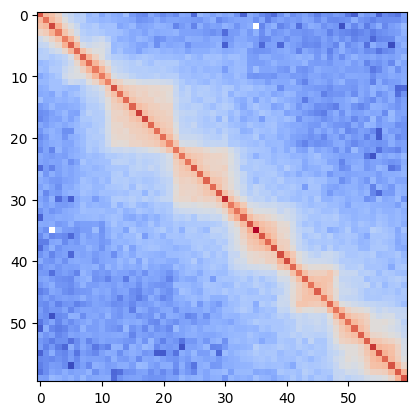

In [4]:
resolution = 20000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')
m=clr.matrix(balance=True).fetch('chrX')
pix=clr.pixels(join=True)[:]
bins=clr.bins()[:]
plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')

In [5]:
# Итерируемся по матрице диагнонально, сохраняем степени и получаем вектор средних

z=np.zeros(len(m))
for i in range(len(m)):
  z[i]=np.nanmean(np.diagonal(m,i))

<ipython-input-5-e76e9ce83b1f>:5: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i))


<ipython-input-6-fb803bb700e4>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m))*20000,np.log(z))


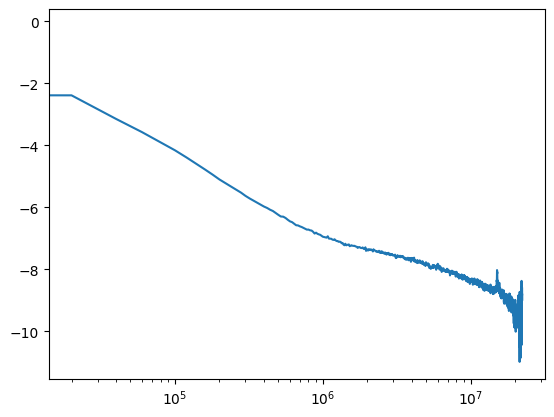

In [6]:
# На данном графике вдоль оси абсцисс распределены координаты диагоналей, а вдоль оси ординат логарифмическая шкала по степеням, полученным в прошлой ячейке
# !!! why do we paste 20000 below? - potomu chto resolution = 20 000 ;)

plt.plot(np.arange(len(m))*20000,np.log(z))
plt.xscale('log')

In [ ]:
binSize = 20000 # - Указываем наше разрешение
dBPMax = 5000000 # - Максимальное допустимое расстояние между участками генома
bDownSample = True # - Опция, позволяющая включить выравнивание до одинакого количества контактов
h=0 # - Опция, позволяющая включить фильтр сглаживания 

fmcool1 = 'drive/MyDrive/hse_minor_bioinfo/HiC1.dm3.mapq_30.1000.mcool'
fmcool2 = 'drive/MyDrive/hse_minor_bioinfo/HiC2.dm3.mapq_30.1000.mcool'
cool1, binSize1 = readMcool(fmcool1, binSize)
cool2, binSize2 = readMcool(fmcool2, binSize)
scc=hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)



In [ ]:
SCC_matrix = np.zeros((4,4))

for i in range (4):
  for j in range(i,4):
    fmcool1 = f'drive/MyDrive/hse_minor_bioinfo/HiC{i + 1}.dm3.mapq_30.1000.mcool'
    fmcool2 = f'drive/MyDrive/hse_minor_bioinfo/HiC{j + 1}.dm3.mapq_30.1000.mcool'
    cool1, binSize1 = readMcool(fmcool1, binSize)
    cool2, binSize2 = readMcool(fmcool2, binSize)
    scc=hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)
    SCC_matrix[i ,j] = np.nanmean(scc)
    SCC_matrix[j ,i] = np.nanmean(scc)

Z=linkage(SCC_matrix, 'single', 'correlation')
plt.figure(figsize=(8,8))
plt.ylabel('distance')

dendrogram(Z, color_threshold=0,labels=[f'Hi{i}' for i in range (1, 5)])
plt.show()

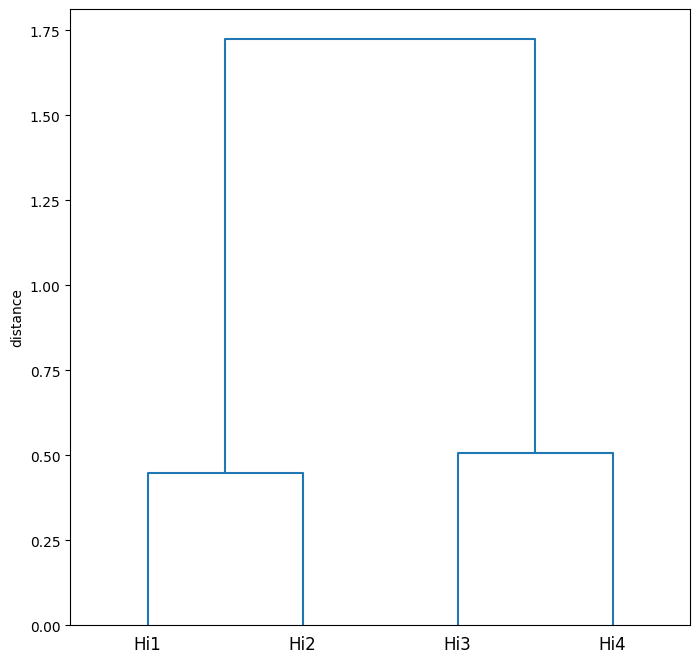

In [12]:
Z=linkage(SCC_matrix, 'single', 'correlation')
plt.figure(figsize=(8,8))
plt.ylabel('distance')

dendrogram(Z, color_threshold=0,labels=[f'Hi{i}' for i in range (1, 5)])
plt.show()